In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Importing dataset from google drive and reading it by using read_csv command
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Netflix dataset/Copy of combined_data_1.txt.zip',
                              header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [5]:
#Checking the datatype of each column in Netflix Dataset
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:

# Checking how many null values are present in Netflix Dataset
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [7]:
# Shows (no_of_rows, Independent features(no.of columns))
netflix_dataset.shape

(24058263, 2)

In [8]:
#Get the customer count with NaN values which is Movie_Id
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count['Rating']

In [9]:
movie_count

4499

In [10]:
# Get unique values from Cust_Id column
customer_count = netflix_dataset['Cust_Id'].nunique()
customer_count

475257

In [11]:
# Extracting all the customer id after removing the movie_id rows such as (1:,2:,3:,....,4499:) from it
customer_count = customer_count - movie_count
customer_count

470758

In [12]:
#How many rating done by all the customers
rating_count = netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [13]:
# Get to know which rating is preferred by most of the people
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

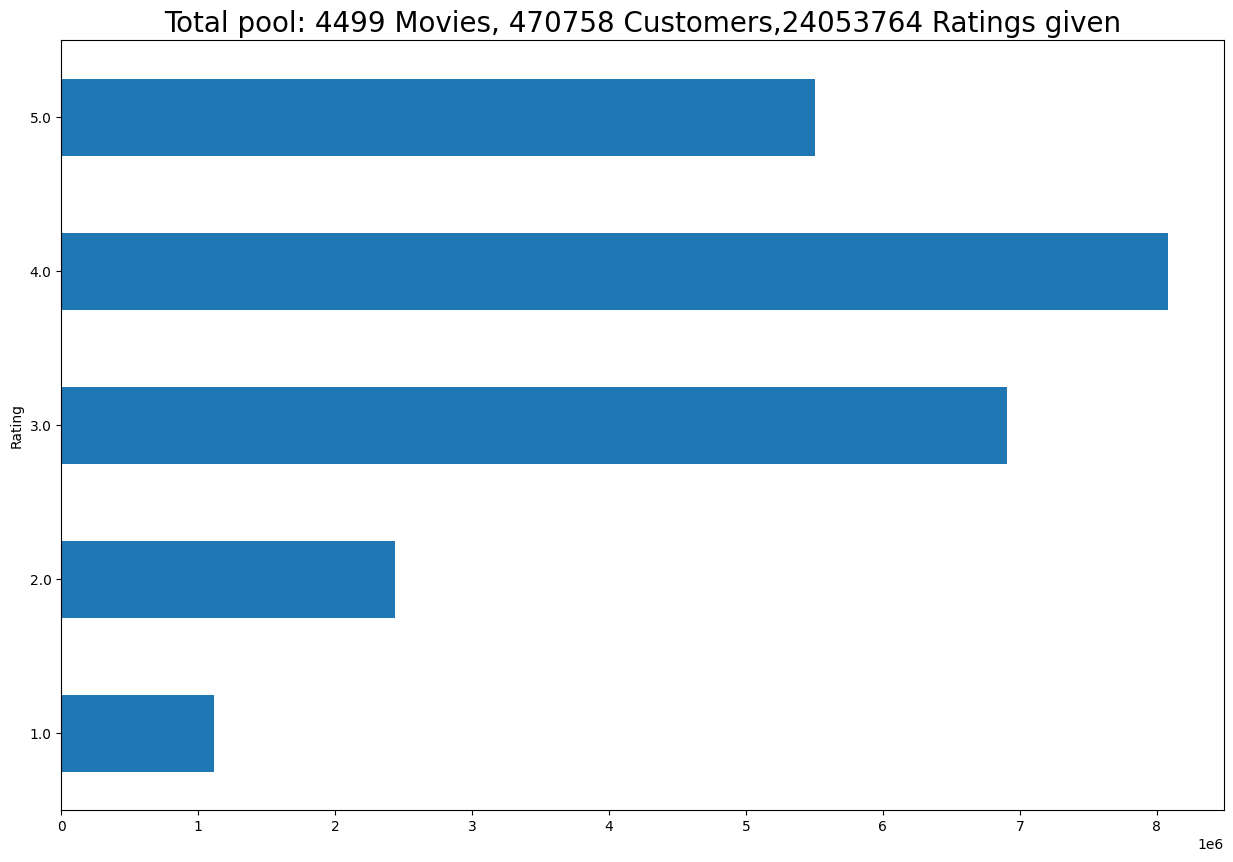

In [14]:
# Bar plot showcasing different ratings done by how many people.
ax = stars.plot(kind ='barh',legend =False, figsize =(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers,{rating_count} Ratings given',fontsize = 20)
plt.grid

In [15]:
df_nan = pd.DataFrame(pd.isnull(netflix_dataset['Rating']))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [16]:
# Through this we try to make a tuple in which we get know about rating
df_nan = df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [17]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [18]:
df_nan.shape

(4499, 1)

In [19]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [20]:
#now we will reset the index as the column
df_nan.reset_index(inplace = True)

In [21]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [22]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on

movie_np =[]
movie_id =1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
  temp = np.full((1,i-j-1),movie_id)
  movie_np = np.append(movie_np, temp)
  movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record = np.full((1,len(netflix_dataset)-df_nan.iloc[-1,0]-1),movie_id)
movie_np = np.append(movie_np,last_record)

In [23]:
# Converting datatype of both the columns to 'int'
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype('int')
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype('int')
print('Now the dataset looks like')
netflix_dataset

<ipython-input-23-4f7fd210affb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype('int')


Now the dataset looks like


<ipython-input-23-4f7fd210affb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype('int')


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [24]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(['count'])

In [25]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [26]:
dataset_movie_summary['count'].quantile(0.7)

1798.6

In [27]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [28]:
drop_movie_list =dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [29]:
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(['count'])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [30]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [31]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

**Remove all the users that have rated less movies and
also all those movies that has been rated less in numbers**



In [32]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print(f"After the trimming,the shape of the dataset is{netflix_dataset.shape}")

After the trimming,the shape of the dataset is(17337458, 3)


In [33]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


**Importing Movie Dataset**


In [34]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix dataset/Copy of movie_titles.csv",encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id',inplace =True)

In [35]:
df_title.head(5)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [36]:
# Installing surprise library
#To get :
#SVD Model (Break the model ,find out trend and do hypothesis and make prediction)
#Dataset module :In this module,function's name called load_from_df (convert the data into SVD readable format)
#SVD needs an object to read the data from it by using Reader

! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162675 sha256=563f191e17d7d047db72ba0d8acc68d640a2c6ff02d067830fa069a7765fa430
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [37]:
from surprise import Reader, SVD, Dataset
from surprise.model_selection import cross_validate

In [38]:
reader = Reader()

In [39]:
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']],reader)

In [40]:
model = SVD()

In [41]:
cross_validate(model,data,measures=['RMSE','MAE'],cv=4)

{'test_rmse': array([0.85148637, 0.85114841, 0.85127724, 0.85134276]),
 'test_mae': array([0.66084013, 0.66137338, 0.66150567, 0.66156263]),
 'fit_time': (267.3269536495209,
  264.9485056400299,
  264.16865277290344,
  266.41637897491455),
 'test_time': (64.13747787475586,
  51.1562876701355,
  61.276870250701904,
  58.20435166358948)}

In [42]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [43]:
user_1331154 = df_title.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [44]:
user_1331154 = user_1331154.reset_index()

In [47]:
user_1331154 = user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [48]:
# To do recommendation by using estimation score
user_1331154['Estimate_score']= user_1331154['Movie_Id'].apply(lambda x:model.predict(1331154, x).est)
user_1331154

,Movie_Id,Year,Name,Estimate_score
2,3,1997.0,Character,4.114503
7,8,2004.0,What the #$*! Do We Know!?,4.045502
15,16,1996.0,Screamers,3.075916
16,17,2005.0,7 Seconds,2.984107
17,18,1994.0,Immortal Beloved,4.052247
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.701964
17766,17767,2004.0,Fidel Castro: American Experience,3.701964
17767,17768,2000.0,Epoch,3.701964
17768,17769,2003.0,The Company,3.701964


In [57]:
#Top 10 recommending movies
user_1331154 = user_1331154.sort_values('Estimate_score',ascending = False)
user_1331154

,Movie_Id,Year,Name,Estimate_score
2547,2548,2000.0,Gilmore Girls: Season 1,5.000000
773,774,2003.0,Foyle's War: Set 2,4.996496
1946,1947,2002.0,Gilmore Girls: Season 3,4.991910
1993,1994,2005.0,The L Word: Season 2,4.967585
3455,3456,2004.0,Lost: Season 1,4.956050
4426,4427,2001.0,The West Wing: Season 3,4.938802
1475,1476,2004.0,Six Feet Under: Season 4,4.898504
31,32,2004.0,ABC Primetime: Mel Gibson's The Passion of the...,4.835141
644,645,2004.0,Dear Frankie,4.808695
1494,1495,2001.0,Alias: Season 1,4.790397
